In [9]:
import os

Lets install the fastai package and the the duckduckgo search engine (version 6.2+)
Quietly installs or upgrades (-Uqq)----> (U = Upgrade)(qq = install quietly):
- fastai
- duckduckgo_search (ensuring version 6.2+)

In [1]:
!pip install -Uqq fastai duckduckgo_search>=6.2


In [13]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

DDGS
What it does:
Imports the DDGS class from the duckduckgo_search library.

Why DDGS?
DDGS() is used to do advanced DuckDuckGo search, supporting .images(), .text(), .videos(), etc.

def search_images(....)
---> You're preparing a utility to:
-Search DuckDuckGo for images
-Extract their URLs
-Easily integrate it into an image classification/ML workflow with FastAI
-It's efficient, modern, and modular — perfect for ML projects where you want to dynamically fetch data from the web.




In [14]:
urls = search_images('cat photos', max_images=1)
urls[0]

'https://images.hdqwalls.com/wallpapers/cute-kitten-4k-im.jpg'

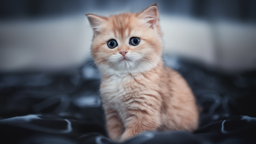

In [15]:


from fastdownload import download_url#1
dest = 'cat.jpg'#2
download_url(urls[0], dest, show_progress=False)#3

from fastai.vision.all import * #4
im = Image.open(dest) #5
im.to_thumb(256,256) #6



Here, 
1. It simplifies downloading files
2. it saves the image as cat.jpg
3. download the url given above and saves it as the dest file name
4. Imports visual operators like image etc from the fastai library
5. Opens the image and saves it in im
6. Displays the image as a thumbnail and displays it 


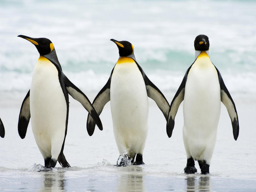

In [17]:
download_url(search_images('penguin photos', max_images=1)[0], 'penguin.jpg', show_progress=False)
Image.open('penguin.jpg').to_thumb(256,256)

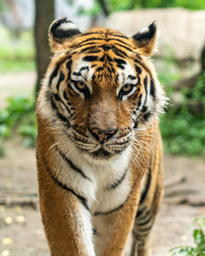

In [32]:
download_url(search_images('tigers photo', max_images=1)[0], 'tigers.jpg', show_progress=False)
Image.open('tigers.jpg').to_thumb(256,256)

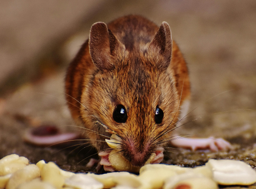

In [34]:
download_url(search_images('mouse photos', max_images=1)[0], 'mouse.jpg', show_progress=False)
Image.open('mouse.jpg').to_thumb(256,256)

In [18]:
searches = 'penguin','cat'  #1
path = Path('cat_or_not')   #2

for o in searches: #3
    dest = (path/o)   #4
    dest.mkdir(exist_ok=True, parents=True) #5
    download_images(dest, urls=search_images(f'{o} photo')) #6
    time.sleep(5) #6
    resize_images(path/o, max_size=400, dest=path/o) #7

1. Creates 2 variables penguin and cat
2. Creates a new folder cat_or_not)
3. s
4. creates two new folders inside your cat_or_not folder
5. -
6. downloads 200 images of o(which can be cat or penguin according to the folder)


In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


28

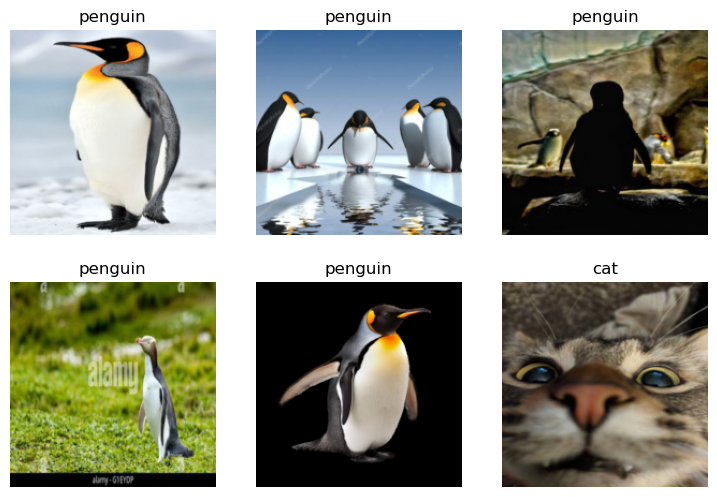

In [20]:


dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)



DataBlock
-This creates a blueprint for building your data pipeline. It's highly customizable and lets you specify:
-Input and output types (e.g., images → categories)
-How to get the items
-How to split them into training/validation
-How to label them
-How to preprocess them



In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\anand/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:06<00:00, 7.66MB/s]


| Step                  | Purpose                                                                  |
| --------------------- | ------------------------------------------------------------------------ |
| `vision_learner(...)` | Loads a ResNet-18 model with your cat-vs-penguin data                    |
| `fine_tune(3)`        | Fine-tunes the model for 3 epochs using transfer learning                |
| Result                | A trained classifier that can tell cats from penguins with high accuracy |


In [36]:
is_cat,_,probs = learn.predict(PILImage.create('mouse.jpg'))
print(f"This is a: {is_cat}.")
print(f"Probability it's a cat: {probs[0]:.4f}")

This is a: cat.
Probability it's a cat: 0.9988
